In [2]:
%matplotlib inline
%run ../../import_envs.py
%run ../apg_hyperparams.py

CUDA = torch.cuda.is_available()
DEVICE = torch.device('cuda:1')

probtorch: 0.0+5a2c637 torch: 1.3.0
inference method:apg, resampling:systematic, apg sweeps:3, epochs:100, sample size:20, batch size:5, learning rate:0.0002


In [3]:
K = 5
T = 20

# train data path
DATA_PATHS = []
TEST_DATA_DIR = BMNIST_DIR + 'bmnist/test_%dT_%dD/' % (T, K)
print('===Loading testing data from %s===' % TEST_DATA_DIR)
for file in os.listdir(TEST_DATA_DIR):
    DATA_PATHS.append(os.path.join(TEST_DATA_DIR, file))

===Loading testing data from /data/hao/apg_data/bmnist/test_20T_5D/===


In [4]:
from apg_modeling import init_model
from affine_transformer import Affine_Transformer

model, optimizer = init_model(frame_pixels=FRAME_PIXELS,
                               digit_pixels=DIGIT_PIXELS, 
                               num_hidden_digit=NUM_HIDDEN_DIGIT, 
                               num_hidden_coor=NUM_HIDDEN_COOR, 
                               z_where_dim=Z_WHERE_DIM, 
                               z_what_dim=Z_WHAT_DIM, 
                               CUDA=CUDA, 
                               DEVICE=DEVICE, 
                               LOAD_VERSION=LOAD_VERSION, 
                               LR=LR)
AT = Affine_Transformer(frame_pixels=FRAME_PIXELS, 
                        digit_pixels=DIGIT_PIXELS, 
                        CUDA=CUDA, 
                        DEVICE=DEVICE)

In [6]:
%run ../apg_testing.py
BATCH_SIZE_TEST = 1
SAMPLE_SIZE_TEST = 1
APG_SWEEPS_TEST = 10
DATA_PTR = 5
SAVE_NAME = 'samples-%d' % DATA_PTR
frames = sample_data_uniform(DATA_PATHS, DATA_PTR)
metrics = test_single(model=model, 
                      AT=AT,
                      apg_sweeps=APG_SWEEPS_TEST, 
                      frames=frames, 
                      mnist_mean_path=MNIST_MEAN_PATH,
                      K=K,
                      sample_size=SAMPLE_SIZE_TEST, 
                      CUDA=CUDA, 
                      DEVICE=DEVICE)

/home/hao/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:2751: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "
/home/hao/anaconda3/lib/python3.7/site-packages/torch/nn/functional.py:2693: UserWarning: Default grid_sample and affine_grid behavior will be changed to align_corners=False from 1.4.0. See the documentation of grid_sample for details.
  warnings.warn("Default grid_sample and affine_grid behavior will be changed "


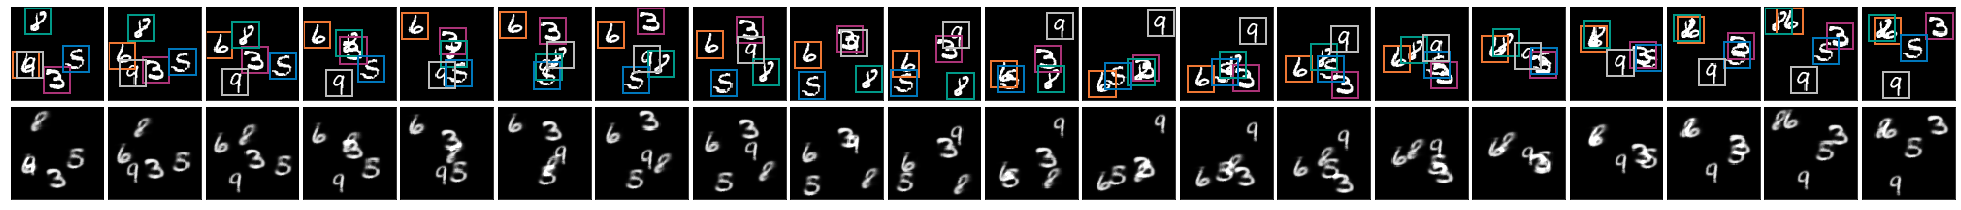

In [9]:
from viz import viz_samples
viz_samples(frames=frames,
            metrics=metrics,
            apg_sweeps=APG_SWEEPS_TEST,
            K=K, 
            viz_interval=3, 
            figure_size=30, 
            title_fontsize=20, 
            linewidth=2,
            colors=['#AA3377', '#EE7733', '#009988', '#0077BB', '#BBBBBB', '#EE3377', '#DDCC77'],
            save_name=None)

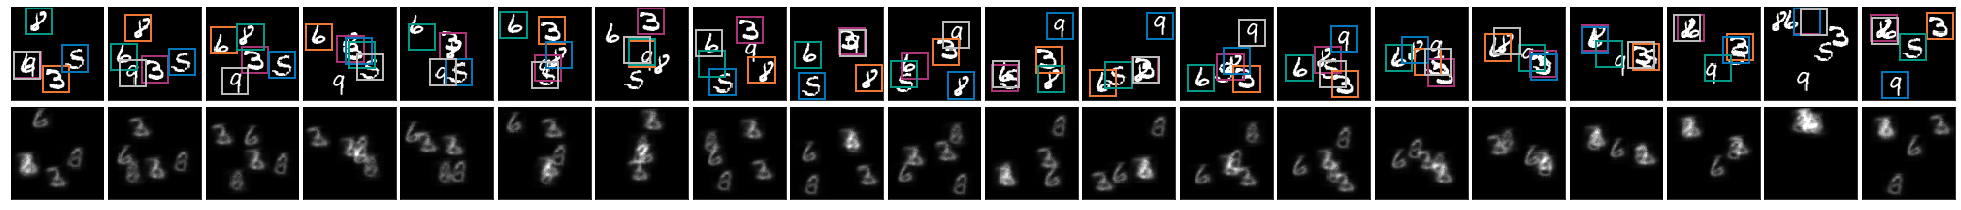

In [9]:
## RWS results
APG_SWEEPS_TEST = 0
metrics = test_single(model=model, 
                      AT=AT,
                      apg_sweeps=APG_SWEEPS_TEST, 
                      frames=frames, 
                      mnist_mean_path=MNIST_MEAN_PATH,
                      K=K,
                      sample_size=SAMPLE_SIZE_TEST, 
                      CUDA=CUDA, 
                      DEVICE=DEVICE)
viz_samples(frames=frames,
            metrics=metrics,
            apg_sweeps=APG_SWEEPS_TEST,
            K=K, 
            viz_interval=3, 
            figure_size=30, 
            title_fontsize=20, 
            linewidth=2,
            colors=['#AA3377', '#EE7733', '#009988', '#0077BB', '#BBBBBB', '#EE3377', '#DDCC77'],
            save_name=None)